## Python Lab 1: Urban Heat Island analysis and detection
#### Companion paper: *Indications of the Urban Heat Island in Athens, Greece* by Katsoulis and Theoharatos

In this lab we will use raw weather station data to examine whether or not Vancouver exhibits an Urban Heat Island. To do this we will take a period of weather data from two weather stations - one in downtown Vancouver, and one well outside of the city - and compare them to see if we can detect any variations that might suggest the presence of an Urban Heat Island effect in Vancouver. Have a look at the companion paper noted above and provided with the lab for some idea of how this work is done in real life. Specifically, the technical term for the variable or *parameter* that we will use is *screen-height, dry-bulb air temperature* - in particular, we will use daily maximum and daily minimum data. *Screen-height* means 1.5m above the ground, which is a World Meteorological Organization standard, and *dry-bulb* is what most people would consider "normal" air temperature, but is specifically separated from two other parameters *wet-bulb air temperature* and *dew-point temperature*. 

Our pedagogical learning objective is the following: to start learning how to use data to analyse examine a physical problem. This will involve taking raw data and "reducing" it, or performing analyses on it using python commands and codde, to generate results (plots, statistical analyses) that will allow us to draw conclusions about the phenomenon under investigation. 

Our technical/python learning objectives are the following: 
1. How to read in data from a text file
2. how to start spotting errors in the data
3. How to handle dates
4. How to make basic plots
5. How to reduce data for analysis
6. How to do a basic student's t-test

***
### Import modules
The first thing we do is usually importing modules you will need. A module is a library that contains the functions necessary to run your code. A function is a small piece of code that performs a specific task. An example is `print()`. It will print to the display window whatever you tell it. A function always has `()`. In the parentheses you put the argument for the function. A function does not always need an argument, but it must have the `()` (that is, they can be empty).  

Typically we start a program by importing whatever modules you will need and usually we give them a simplified "handle", just because it gets cumbersome to always type the name of the module. We have to use the module name whenever we request a function from that module. `print()` is core to all python and it doesn't belong to a library, so it is just `print()`. But - a speacilized reader that we use from the `pandas` library, `read_csv()`, must be called like `pandas.read_csv()`. A handle shortens that. 

Note the handle could be anything. You could say 
`import pandas as p`
and then any pandas functions would be called like: 
`junk_data = p.read_csv("1100030.ascii")`
But we'll use pd because that is sort of a convention, so use `import pandas as pd`.

### Reference information
<b>Nice intro discussion about pandas, with tutorials no less! _Strongly_ encouraged to look at the tutorials...</b> https://pandas.pydata.org/docs/getting_started/index.html
<b>This also has nice intro guides:</b> https://pandas.pydata.org/docs/user_guide/index.html
<b>pandas dataframe object reference documentation found here:</b>https://pandas.pydata.org/docs/reference/frame.html
<b>pandas general reference documentation found here:</b> https://pandas.pydata.org/docs/reference/index.html <br>

<b>pinguoin reference documentation found here:</b> https://pingouin-stats.org/index.html <br>

<b>pinguoin ttest reference documentation found here:</b> https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest


In [ ]:
import pandas as pd

Make a copy of the datasets on a local drive. 

Now you will enter the code required to read an external set of data into memory in a format that python understands. But before typing python code, you should always open your raw data in a text viewer. I strongly recommend a program called `notepad ++`. Exmaining the file in `notepad ++` reveals three important points:  

1. The data are "human-readable", which helps us guide how we will read it into python.
2. Individual data values are separated by commas (a "comma separated value" or .csv file), which further helps guide us to a reading strategy.
3. There are two "header" lines: the first is kind of a throwaway bit of info, but the second header line is important to take note of because it contains the names of the variables that will be automatically assigned if we choose. This information will additionally refine our strategy for reading in the data. 

There are many ways to read files into a computer. In this case, because we have noted it is a comma separated file, we can use a pandas command `read_csv`. Perform a basic read using the `read_csv` function provided by pandas:

In [ ]:
stn1 = pd.read_csv("110A1ND.ascii") 

A couple of things here. 

1. This an "assignment" statement in python (or any language). **The equals sign here is not a mathematical equivalency statement.** It simply tells python to make a spot in memory - a variable - and call it "stn1" and store the results of the read_csv statment there. 
2. It probably didn't work for you just like this. You need to specify a path that leads the computer to that specific file. Your path will be "drive/373-Lab1/filename.ascii" or something - look at the file folder on the left and open the subfolders until you get to your data file.

Now type the name of the new variable to display what python has read in. Take careful note of the output. Does it make sense? What needs to be done to improve it?

In [ ]:
stn1

station_observations
ONE_DAY_PRECIPITATION  ONE_DAY_RAIN  MIN_TEMP  ONE_DAY_SNOW  time                 SNOW_ON_THE_GROUND             MAX_TEMP
0.0                    0.0           None      0.0           1987-04-01 00:00:00  0.0                                None
                                                             1987-04-02 00:00:00  0.0                                None
7.0                    7.0           None      0.0           1987-04-03 00:00:00  0.0                                None
0.0                    0.0           None      0.0           1987-04-04 00:00:00  0.0                                None
                                                             1987-04-05 00:00:00  0.0                                None
10.0                   10.0          None      0.0           1987-04-06 00:00:00  0.0                                None
                                                             1987-04-07 00:00:00  0.0                                None
0.0                    0.0           None      0.0           1987-04-08 00:00:00  0.0                                None
12.0                   12.0          None      0.0           1987-04-09 00:00:00  0.0                                None
3.6                    3.6           None      0.0           1987-04-10 00:00:00  0.0                                None
2.5                    2.5           None      0.0           1987-04-11 00:00:00  0.0                                None
0.8                    0.8           None      0.0           1987-04-12 00:00:00  0.0                                None
6.9                    6.9           None      0.0           1987-04-13 00:00:00  0.0                                None
0.0                    0.0           None      0.0           1987-04-14 00:00:00  0.0                                None
19.0                   19.0          None      0.0           1987-04-15 00:00:00  0.0                                None
0.4                    0.4           None      0.0           1987-04-16 00:00:00  0.0                                None
0.0                    0.0           None      0.0           1987-04-17 00:00:00  0.0                                None
                                                             1987-04-18 00:00:00  0.0                                None
                                                             1987-04-19 00:00:00  0.0                                None
                                                             1987-04-20 00:00:00  0.0                                None
                                                             1987-04-21 00:00:00  0.0                                None
                                                             1987-04-22 00:00:00  0.0                                None
                                                             1987-04-23 00:00:00  0.0                                None
                                                             1987-04-24 00:00:00  0.0                                None
                                                             1987-04-25 00:00:00  0.0                                None
                                                             1987-04-26 00:00:00  0.0                                None
                                                             1987-04-27 00:00:00  0.0                                None
                                                             1987-04-28 00:00:00  0.0                                None
7.6                    7.6           None      0.0           1987-04-29 00:00:00  0.0                                None
...                                                                                                                   ...
9.9                    9.9           5.0       0.0           1998-03-02 00:00:00  0.0                                 8.5
0.4                    0.4           2.0       0.0           1998-03-03 00:

Answer: We want to get rid of the first row of data. The only thing in the first row is the word "station_observations" which is of no use. We don't have to modify the original file but instead can control the reading process from within `read_csv`. We need to skip the first row and start reading information on the second line. Consulting the read_csv documentation https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv
we can see there is an *argument* for the function termed "skiprows". If we set `skiprows=1` read_csv will jump over the first line of the data file. Note that we can skip as many lines as we want if needed - we just set the argument to the appropriate number. 1 is fine for us today.

In [ ]:
stn1 = pd.read_csv("110A1ND.ascii",skiprows=1) 

Again just type the name of the variable to see how we did:

In [ ]:
stn1

,ONE_DAY_PRECIPITATION,ONE_DAY_RAIN,MIN_TEMP,ONE_DAY_SNOW,time,SNOW_ON_THE_GROUND,MAX_TEMP
0,0.0,0.0,None,0.0,1987-04-01 00:00:00,0.0,None
1,0.0,0.0,None,0.0,1987-04-02 00:00:00,0.0,None
2,7.0,7.0,None,0.0,1987-04-03 00:00:00,0.0,None
3,0.0,0.0,None,0.0,1987-04-04 00:00:00,0.0,None
4,0.0,0.0,None,0.0,1987-04-05 00:00:00,0.0,None
...,...,...,...,...,...,...,...
4013,0.0,0.0,1.5,0.0,1998-03-27 00:00:00,0.0,8.5
4014,0.0,0.0,0.0,0.0,1998-03-28 00:00:00,0.0,12.5
4015,0.0,0.0,-0.5,0.0,1998-03-29 00:00:00,0.0,12.5
4016,13.7,13.7,5.5,0.0,1998-03-30 00:00:00,0.0,7.0


This result looks much better. Let's see what pandas has read in for the column names. It will assume, unless we use an argument to tell it otherwise, that the first row contains variable names. To do this we take advantage of an important fact: the variable `stn1` is an object in python parlance, and all objects have attributes and methods. A list of the column names is one of the attributes that we can access using the `columns` attribute. How to make it work? All we do is put a dot after `stn1` and then the attribute name. 

In [ ]:
stn1.columns

Index(['ONE_DAY_PRECIPITATION', ' ONE_DAY_RAIN', ' ONE_DAY_SNOW', ' time',
       ' MIN_TEMP', ' MAX_TEMP', ' SNOW_ON_THE_GROUND'],
      dtype='object')

Now we can see exactly what python has assigned to each column as its name. We can use this column name to conveniently reference the data in that particular column. Now we want to start removing columns that we don't need, or keeping those we do need. We'll start by trying to retain just one column. To do this we can use the `usecols` argument for `read_csv`. Run the code below:

In [ ]:
stn1 = pd.read_csv("110A1ND.ascii",skiprows=1,usecols=["MAX_TEMP"])  

ValueError: Usecols do not match columns, columns expected but not found: ['MAX_TEMP']

##### Error example
If you run the line of code above you will get an example of an error, one that gives an example of how carefully you have pay attention to what you are reading in. When I ask the read_csv function to keep the MAX_TEMP column I got an error - it's saying it can't find the column labelled "MAX_TEMP". Look back at the raw data in the original notepad file and try to figure out what is going on. Someday you will be doing this on your own without the answer on the next line, so give it an honest try and determine why it's returning this error. You can also look at the column names we printed out. Remember how literal computers are.

Ultimately it's saying it can't find columns named "MAX_TEMP" and "MIN_TEMP". But we just above, when we did a trial read of the data, that columns with those names existed. Why is it returning this error?

In [ ]:
stn1 = pd.read_csv("110A1ND.ascii",
                   skiprows=1,
                   usecols=[" MIN_TEMP"," MAX_TEMP"])  

I like to drop down a line to show each argument on its own line. It is easier to read I think, but this is entirely personal prefernce. We are now reading in the columns containing max and min air temperature. Notice carefully that we place multiple column names in a _list object_, which is denoted by [ ] .

In [ ]:
stn1

,MIN_TEMP,MAX_TEMP
0,1.7,10.0
1,1.7,6.7
2,1.7,6.7
3,1.7,6.7
4,1.7,10.0
5,6.7,8.9
6,2.8,7.2
7,1.7,6.1
8,1.7,6.7
9,1.7,8.3


##### Create a datetime field
We want to capture the date information. Python does not automatically understand which column the date may be in. You have to explicitly tell it. In order for python to recognize that a bunch of values do represent a date we have to give python all of the details of format. Luckily, another great thing pandas does is it is able to try to understand a date field in an automatic way. There is another argument, `parse_dates`, which performs this task. The { } indicate a _dictionary_ object that is used to declare "keys" and "values". In this case, we have a structure `{'new_variable_name': ['old_variable']}`. For us the new variable we will create will be called `datetime` and we will ask pandas to try to interpret the column we read in which was `time`: 

In [ ]:
stn1 = pd.read_csv("110A1ND.ascii",
                   skiprows=1,
                   usecols=[" MIN_TEMP"," MAX_TEMP"," time"],
                   parse_dates={'datetime': [' time']})  

##### handle missing values
Python (and many other languages) need to treat missing data in a very particular way. Python sets a missing value not to a blank but to something called "NaN", or "Not a Number". There is an argument that tells the `read_csv` function what the missing values are in our dataset, which is the word " None", with a leading space. We assign to the argument `na_values` the value for missing in the data, " None", as below. 

In [ ]:
stn1 = pd.read_csv("110A1ND.ascii",
                   skiprows=1,
                   usecols=[" MIN_TEMP"," MAX_TEMP"," time"],
                   parse_dates={'datetime': [' time']},
                   na_values=[' None'])  

We can go a step farther and take control of the _variable type_ the different data columns in the variable. Basic variable types are **string**, **integer**, and **float**, for floating point (i.e. numbers with a decimal place).

In [ ]:
stn1 = pd.read_csv("110A1ND.ascii",
                   skiprows=1,
                   usecols=[" MIN_TEMP"," MAX_TEMP"," time"],
                   parse_dates={'datetime': [' time']},
                   na_values=[' None'],
                   dtype={' MIN_TEMP':float,' MAX_TEMP':float})  

In [ ]:
%matplotlib inline

AttributeError: module 'matplotlib' has no attribute 'interactive'

This gives us a pretty much complete `read_csv` function with all of the arguments set properly to read the data into a format we can work with in the Python environment.

##### Attach the date as an index
Now we need to set the date as the index. This will help with plotting and it will allow us to perform actions on subsets of the data, such as taking the mean of every month. Use the `set_index` method of a dataframe object to do this (see the line below). You will use as an argument for the function the name of the column with the date/time value in it. This column is called `datetime` in our case:

In [ ]:
stn1.set_index('datetime')


,MIN_TEMP,MAX_TEMP
datetime,,
1987-04-01,NaN,NaN
1987-04-02,NaN,NaN
1987-04-03,NaN,NaN
1987-04-04,NaN,NaN
1987-04-05,NaN,NaN
...,...,...
1998-03-27,1.5,8.5
1998-03-28,0.0,12.5
1998-03-29,-0.5,12.5


In [ ]:
stn1.size

12054

Something to take careful note of: if you look at the `stn1` dataframe again you will see that `datetime` is still a regular column, and the index is still 0,1,2,3... In most cases you have to assign the operation to a new variable or use the `inplace=True` argument; see further below.  


In [ ]:
stn1

,datetime,MIN_TEMP,MAX_TEMP
0,1987-04-01,NaN,NaN
1,1987-04-02,NaN,NaN
2,1987-04-03,NaN,NaN
3,1987-04-04,NaN,NaN
4,1987-04-05,NaN,NaN
...,...,...,...
4013,1998-03-27,1.5,8.5
4014,1998-03-28,0.0,12.5
4015,1998-03-29,-0.5,12.5
4016,1998-03-30,5.5,7.0


In [ ]:
stn1.set_index('datetime', inplace=True)

In [ ]:
stn1_A1ND = stn1[(stn1.index.year>=1970) & (stn1.index.year<=1999)]

In [ ]:
stn1_A1ND.groupby(pd.Grouper(freq='M')).mean().plot()

ImportError: matplotlib is required for plotting.

In [ ]:
stn1_A1ND.groupby(pd.Grouper(freq='M')).mean()  

,MIN_TEMP,MAX_TEMP
datetime,,
1974-02-28,NaN,NaN
1974-03-31,NaN,NaN
1974-04-30,NaN,NaN
1974-05-31,NaN,NaN
1974-06-30,NaN,NaN
1974-07-31,NaN,NaN
1974-08-31,NaN,NaN
1974-09-30,NaN,NaN
1974-10-31,NaN,NaN


In [ ]:
stn1_A1ND.loc[stn1_A1ND.index.month==6].mean()

 MIN_TEMP    11.005215
 MAX_TEMP    19.503963
dtype: float64

In [ ]:
stn1

,datetime,MIN_TEMP,MAX_TEMP
0,1913-12-01,1.7,10.0
1,1913-12-02,1.7,6.7
2,1913-12-03,1.7,6.7
3,1913-12-04,1.7,6.7
4,1913-12-05,1.7,10.0
5,1913-12-06,6.7,8.9
6,1913-12-07,2.8,7.2
7,1913-12-08,1.7,6.1
8,1913-12-09,1.7,6.7
9,1913-12-10,1.7,8.3


#### Next:
* Demo plots
* Read in second and third data sets
* Plot together
* Perform a t-test on selected average periods (e.g. both Januarys)
* Determine what they should hand in. 
* find where the stations are to assist with interpretation of results


run the previous command a second time you will get an error `KeyError: "None of ['datetime'] are in the columns"`. This means that the when the `datetime` column is assigned as an index the first time you run the command, it is now used up or gone from the dataframe and so no longer accessible as a named column. Any further attempts to reference the column return this error. 


0030 = Abbotsford


We can go a step farther and take control of the _variable type_ the different data columns in the variable. Basic variable types are **string**, **integer**, and **float**, for floating point (i.e. numbers with a decimal place).

In [ ]:

import pandas as pd
import plotly as py
import pingouin as pg
import numpy as np


C:\Users\geog524\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


** be sure to keep notes in you code **<br>
station 110A1ND metadata (Burnaby dntn)

In [ ]:
df1 = pd.read_csv('110A1ND.ascii',
                skiprows=1,
                usecols=[' MIN_TEMP',' MAX_TEMP',' time'],
                parse_dates={'datetime': [' time']},
                dtype={' MIN_TEMP':float,' MAX_TEMP':float},
                na_values=[' None']
                )

df1 = df1.rename(columns={' MIN_TEMP':'MIN_TEMP1',' MAX_TEMP':'MAX_TEMP1'})

df1 = df1.set_index('datetime')


** be sure to keep notes in you code **<br>
station 1100030 metadata (Abbotsford airport)

In [ ]:
df3 = pd.read_csv('1100030.ascii',
                skiprows=1,
                usecols=[' MIN_TEMP',' MAX_TEMP',' time'],
                parse_dates={'datetime': [' time']},
                dtype={' MIN_TEMP':float,' MAX_TEMP':float},
                na_values=[' None']
                )

df3 = df3.rename(columns={' MIN_TEMP':'MIN_TEMP3',' MAX_TEMP':'MAX_TEMP3'})

df3 = df3.set_index('datetime')


In [ ]:
df3.tail()

,MIN_TEMP3,MAX_TEMP3
datetime,,
2011-12-27,2.5,8.5
2011-12-28,5.1,11.1
2011-12-29,4.3,8.8
2011-12-30,3.2,8.3
2011-12-31,0.4,4.7


** be sure to keep notes in you code **<br>
station 1104634 metadata (Lion's Bay)


In [ ]:
df2 = pd.read_csv('1104634.ascii',
                skiprows=1,
                usecols=[' MIN_TEMP',' MAX_TEMP',' time'],
                parse_dates={'datetime': [' time']},
                dtype={' MIN_TEMP':float,' MAX_TEMP':float},
                na_values=[' None']
                )

df2 = df2.rename(columns={' MIN_TEMP':'MIN_TEMP2',' MAX_TEMP':'MAX_TEMP2'})
df2 = df2.set_index('datetime')


In [ ]:

df_min = pd.concat([df1.MIN_TEMP1, df2.MIN_TEMP2,df3.MIN_TEMP3], axis=1,join="inner")
df_max = pd.concat([df1.MAX_TEMP1, df2.MAX_TEMP2,df3.MIN_TEMP3], axis=1,join="inner")


In [ ]:
df_min[df_min.index.year==1994].plot()

TypeError: 'DataFrame' object is not callable

In [ ]:
# pingouin
'''
if you want to set a single month as the condition for slicing 
the data frame you can use the == operator
'''

dff = df_min[df_min.index.month==1]

# alternative = greater tests that first dataset > second dataset, so first dataset must be 
# Vancouver because that is our hypothesis, that it is greater. 

pg.ttest(dff.MIN_TEMP1, dff.MIN_TEMP2,  paired=False,r=0.707, alternative="greater", confidence=0.95,correction=False)
pg.ttest(dff.MIN_TEMP1, dff.MIN_TEMP3,  paired=True,r=0.707, alternative="greater", confidence=0.95,correction=False)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.642585,336,greater,1.137099e-16,"[0.69, inf]",0.185186,4.171e+13,0.959756


In [ ]:
jans = dff.groupby(dff.index.year).mean()

pg.ttest(jans.MIN_TEMP1, jans.MIN_TEMP3,  paired=True, r=0.707, alternative = "greater", confidence=0.95,correction=False)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.494539,10,greater,0.000576,"[0.51, inf]",0.401576,71.862,0.343461


<AxesSubplot:xlabel='datetime'>

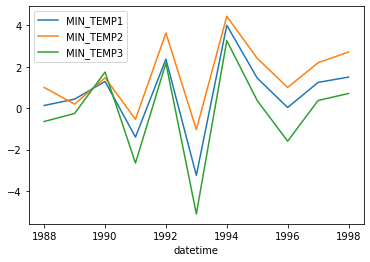

In [ ]:
jans.plot()

In [ ]:
'''
if you want to use a set list of months as the condition for slicing 
the data frame you can use .isin()
be sure to specify the .isin() parameters as a list this can be done 
by adding square brackets [] to the the function like this .isin([]) and
listing the months of interest separated by commas like this [1,2,3]
'''

dff = df_min[df_min.index.month.isin([1,2,3])]

pg.ttest(dff.MIN_TEMP2, dff.MIN_TEMP1, tail='two-sided', paired=False,r=0.707, confidence=0.95,correction=False)


additional functions to explore the data<br>
df.plot()
df.describe()
df.head()
df.tail()
